In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans


In [4]:
from google.colab import files
uploaded = files.upload() 

Saving COVID, FLU, COLD Symptoms.zip to COVID, FLU, COLD Symptoms.zip


In [5]:
# Unzip training data
from zipfile import ZipFile
df = "/content/COVID, FLU, COLD Symptoms.zip"
with ZipFile(df, 'r') as zip:
  zip.extractall()
  print('done')

done


In [6]:
df = pd.read_csv('/content/large_data.csv')
df.sample(5)

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
40928,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,FLU
9617,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,ALLERGY
38070,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,1,0,FLU
31754,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,FLU
19019,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,COVID


In [7]:
#Returns the  meta data of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 44453 non-null  int64 
 1   MUSCLE_ACHES          44453 non-null  int64 
 2   TIREDNESS             44453 non-null  int64 
 3   SORE_THROAT           44453 non-null  int64 
 4   RUNNY_NOSE            44453 non-null  int64 
 5   STUFFY_NOSE           44453 non-null  int64 
 6   FEVER                 44453 non-null  int64 
 7   NAUSEA                44453 non-null  int64 
 8   VOMITING              44453 non-null  int64 
 9   DIARRHEA              44453 non-null  int64 
 10  SHORTNESS_OF_BREATH   44453 non-null  int64 
 11  DIFFICULTY_BREATHING  44453 non-null  int64 
 12  LOSS_OF_TASTE         44453 non-null  int64 
 13  LOSS_OF_SMELL         44453 non-null  int64 
 14  ITCHY_NOSE            44453 non-null  int64 
 15  ITCHY_EYES            44453 non-null

In [8]:
#Returns the information like mean,max,min,etc., of the dataset.
df.describe()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
count,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000
mean,0.520662,0.519762,0.519897,0.519358,0.496232,0.495850,0.325400,0.324253,0.324523,0.323465,0.323893,0.324455,0.422986,0.423234,0.184285,0.184285,0.184285,0.184285,0.519313,0.184240
std,0.499579,0.499615,0.499610,0.499631,0.499991,0.499988,0.468529,0.468100,0.468201,0.467804,0.467965,0.468176,0.494039,0.494077,0.387720,0.387720,0.387720,0.387720,0.499633,0.387684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#To remove the columns of the DataFrame in memory.
df.drop(["TYPE"],axis=1,inplace=True)
df.sample(5)

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
20256,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
37672,1,0,1,1,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0
9072,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,0
28105,1,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0
34666,0,0,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0


In [10]:
#Returns the sum of null values under each column.
df.isnull().sum()

COUGH                   0
MUSCLE_ACHES            0
TIREDNESS               0
SORE_THROAT             0
RUNNY_NOSE              0
STUFFY_NOSE             0
FEVER                   0
NAUSEA                  0
VOMITING                0
DIARRHEA                0
SHORTNESS_OF_BREATH     0
DIFFICULTY_BREATHING    0
LOSS_OF_TASTE           0
LOSS_OF_SMELL           0
ITCHY_NOSE              0
ITCHY_EYES              0
ITCHY_MOUTH             0
ITCHY_INNER_EAR         0
SNEEZING                0
PINK_EYE                0
dtype: int64

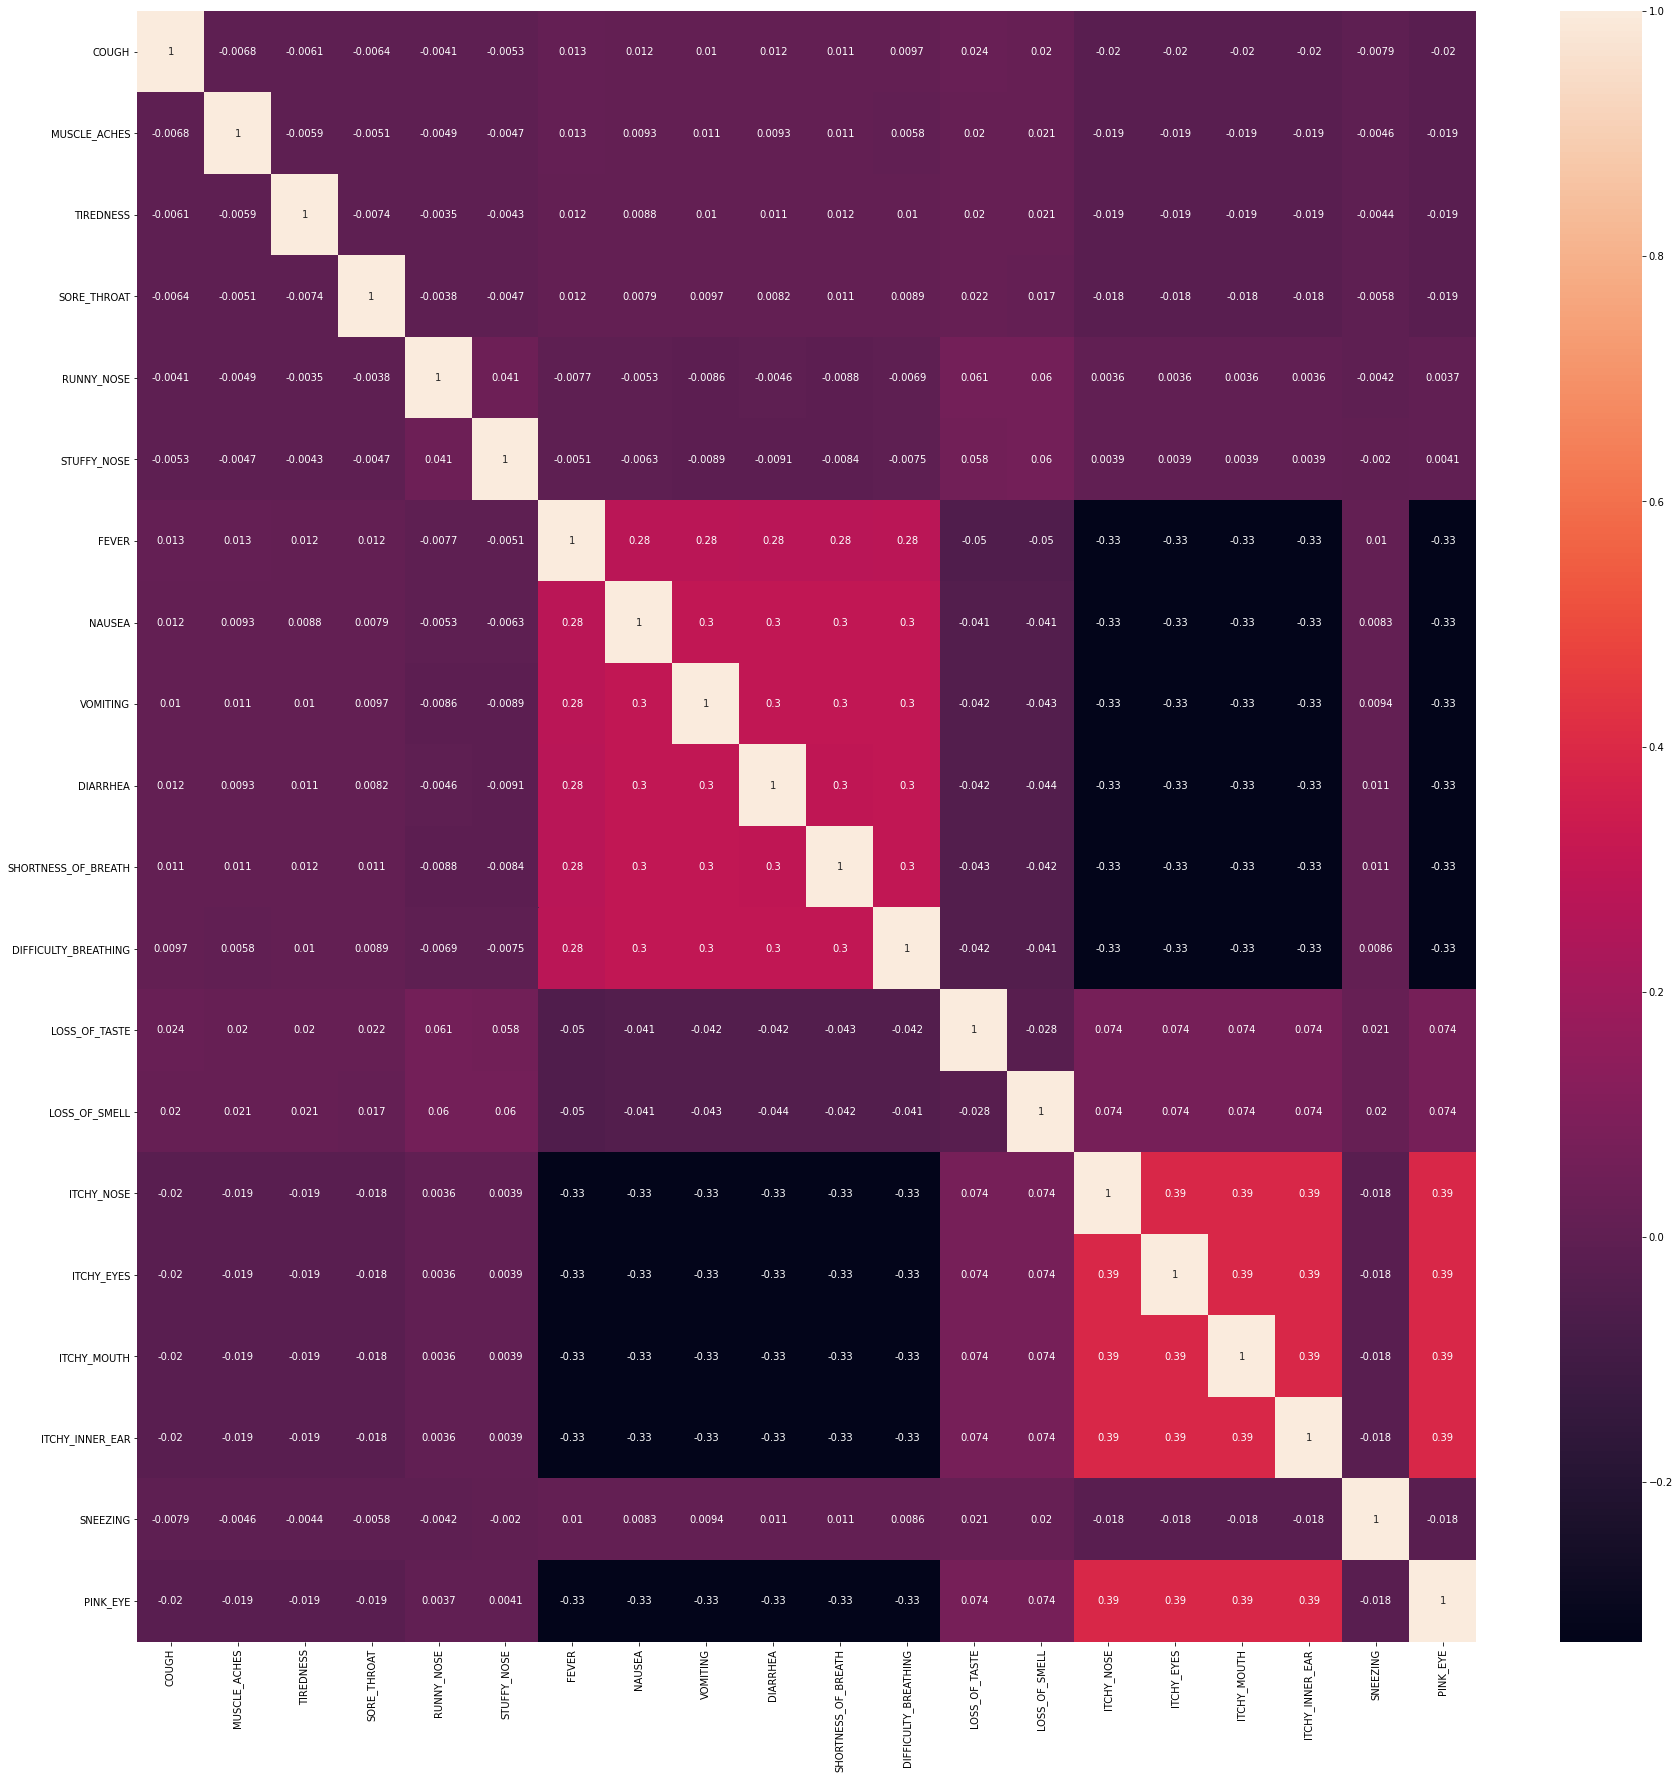

In [11]:
#To plot a correlation matrix between features.
f,ax= plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [25]:
#To scale the values along columns.
scaler= StandardScaler()
df_scaled=scaler.fit_transform(df)

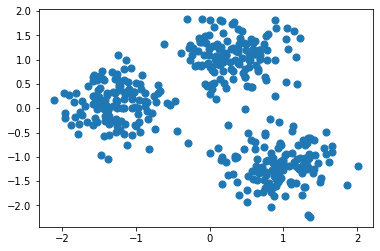

In [26]:
from sklearn.datasets.samples_generator import make_blobs
df, y_true = make_blobs(n_samples=400, centers=3, cluster_std=0.60, random_state=0)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], s=50);

In [27]:

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)
y_kmeans = kmeans.predict(df_scaled)

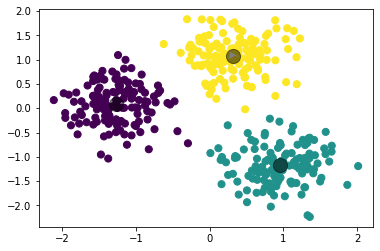

In [28]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

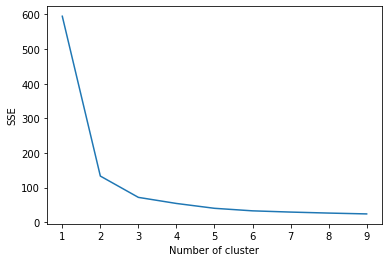

In [30]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
df_scaled = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
data = df_scaled[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()